To start; import the folowing things:

In [2]:
#Setting up the modules to study the experiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data of the experiment
data = pd.read_csv('data.csv')
data.head()

,time,boid,speed,x,y,z
0,0,0,0.005,0.282795,0.524066,0
1,0,1,0.005,0.184813,0.342088,0
2,0,2,0.005,0.616278,0.117566,0
3,0,3,0.005,0.698777,0.213372,0
4,0,4,0.005,0.574639,0.430038,0


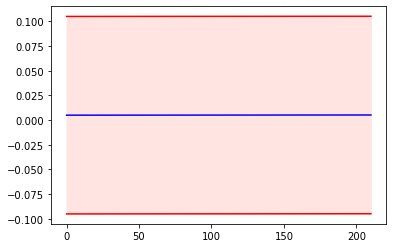

In [53]:
δ = 1.

S = data[["time","speed"]].groupby("time").mean().reset_index().to_numpy()
t = S[:,0]
S = S[:,1]
ΔS= data[["time","speed"]].groupby("time").std( ).to_numpy()[:,0]+0.1
S_p = S + δ * ΔS
S_m = S - δ * ΔS


plt.fill_between(t, S_p, S_m, color="mistyrose")
plt.plot(t,S_p, "red")
plt.plot(t,S_m, "red")
plt.plot(t,S, "blue")